In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
import sys, os
sys.path.append('../../src/')
# import toolbox
from toolbox import *

result_names = ['BBT_Tiingo',                #0
                'BBT_future_Tiingo_ada', 
                'BBT_future_Tiingo_eth',     #2
                'BBT_future_Tiingo_ltc',
                'BBT_future_Tiingo_xrp',     #4
                'BBT_future_BITX',
                'BBT_future_BITW20',         #6
                'BBT_future_BITW70', 
                'BBT_future_BITW100',        #8
                'BBT_future_CRIX']

risk_measures = ['Variance',
                 'ES q=0.05', 'ES q=0.01',
                 'VaR q=0.05', 'VaR q=0.01', 
                 'ERM k=10', 'CH']

order = ['BBT_Tiingo',    
         'BBT_future_CRIX',  'BBT_future_BITX', 'BBT_future_BITW100', 
         'BBT_future_BITW20',  'BBT_future_BITW70',
         'BBT_future_Tiingo_ada', 'BBT_future_Tiingo_eth',  'BBT_future_Tiingo_ltc','BBT_future_Tiingo_xrp']

coin_names = ['btc', 'CRIX', 'BITX', 'BITW100', 'BITW20', 'BITW70', 'ada', 'eth', 'ltc', 'xrp']

In [111]:
rn = 'BBT_future_Tiingo_ada'
# rn = 'BBT_future_Tiingo_eth'

rm = 'Variance'

path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                %(rn, rm)

df = pd.read_csv(path)
df.Date = pd.to_datetime(df.Date)

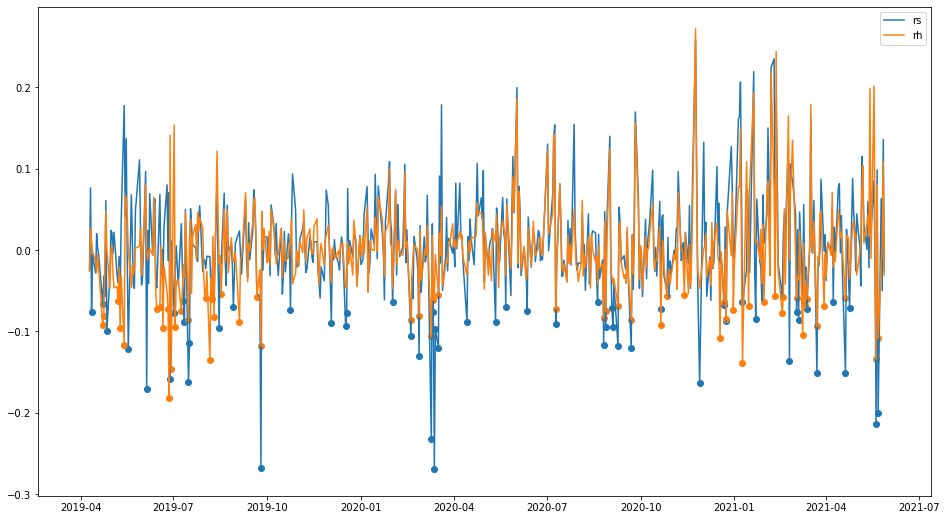

In [112]:
plt.figure(figsize=(16,9))
i = np.array(df.rs) <= np.quantile(df.rs, 0.1)
plt.scatter(np.array(df.Date[i]), df.rs[i])

j = np.array(df.rh) <= np.quantile(df.rh, 0.1)
plt.scatter(np.array(df.Date[j]), df.rh[j])

plt.plot(df.Date, df.rs, label='rs')
plt.plot(df.Date, df.rh, label='rh')
plt.legend()

2021-05-27 20:00:00
2021-05-27 20:00:00
2021-05-27 20:00:00
2021-05-27 20:00:00
2021-05-27 20:00:00
2021-05-27 20:00:00
2021-05-27 20:00:00
2021-05-27 20:00:00
2021-05-27 20:00:00
2021-05-27 20:00:00


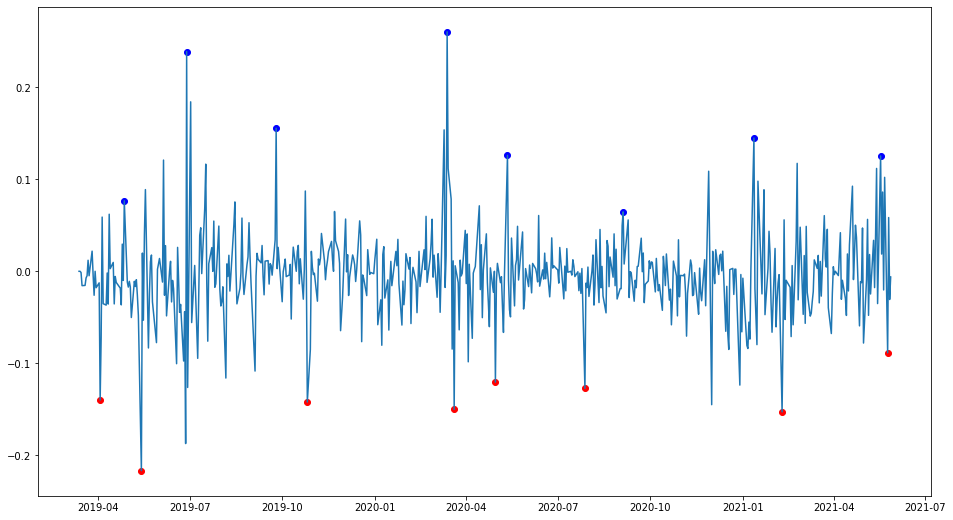

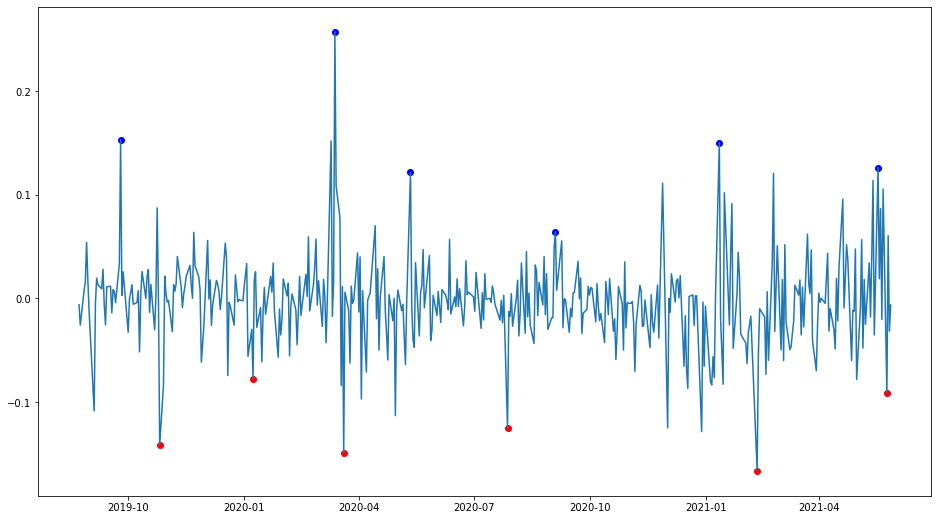

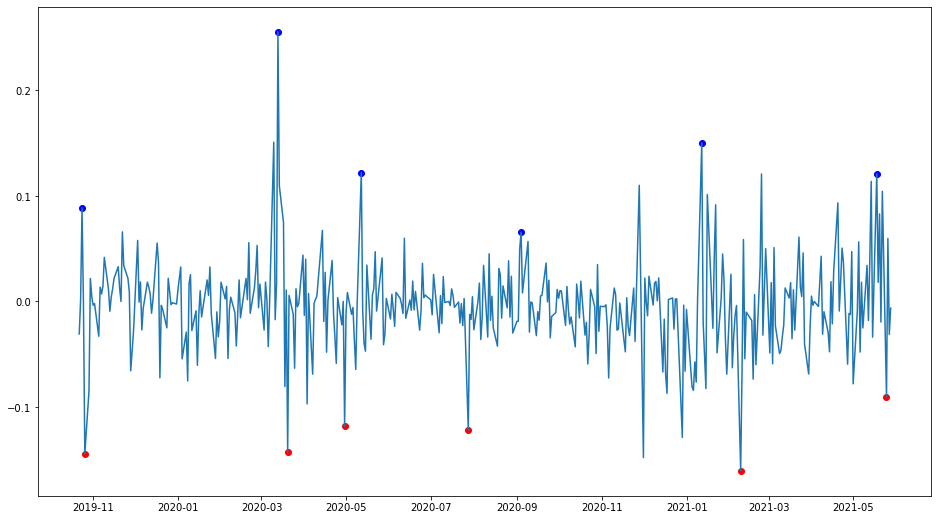

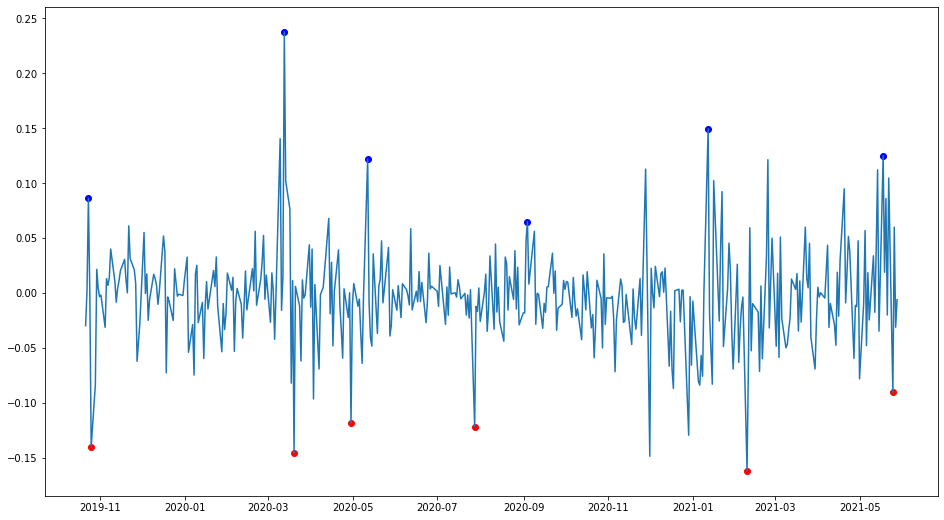

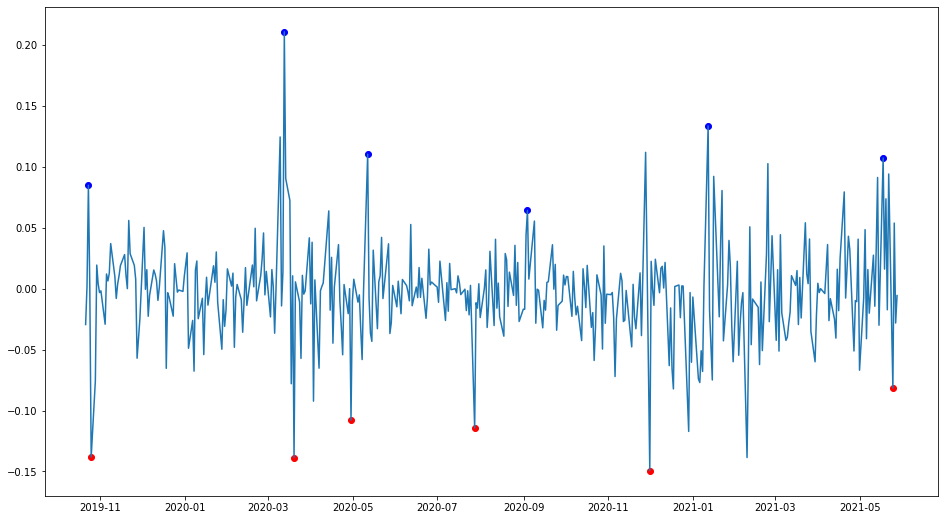

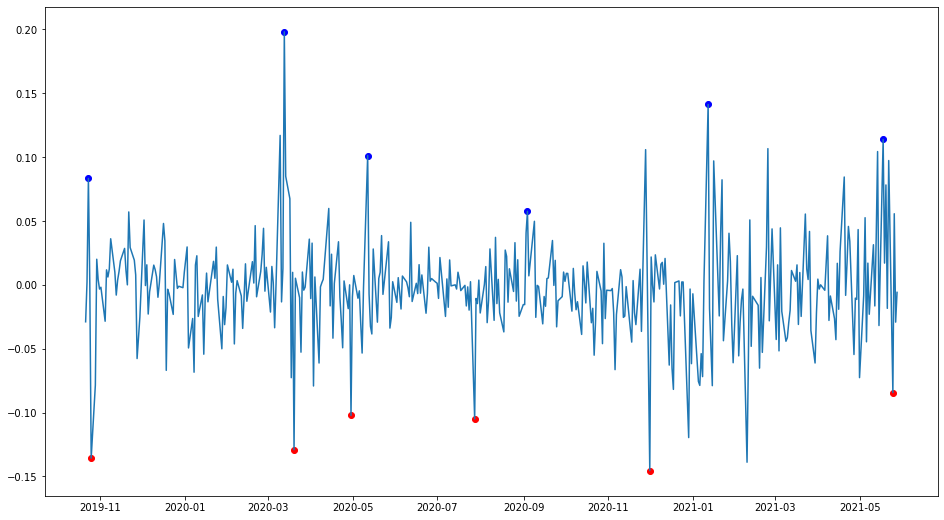

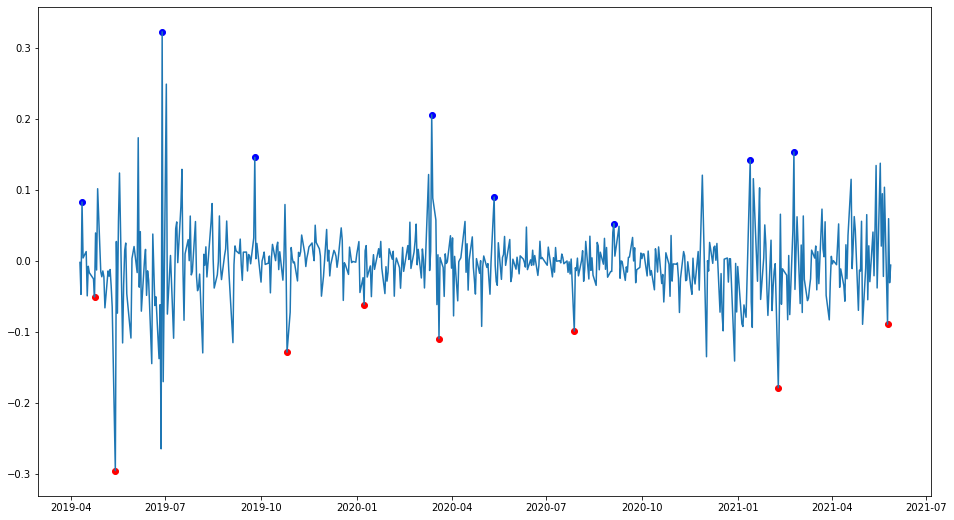

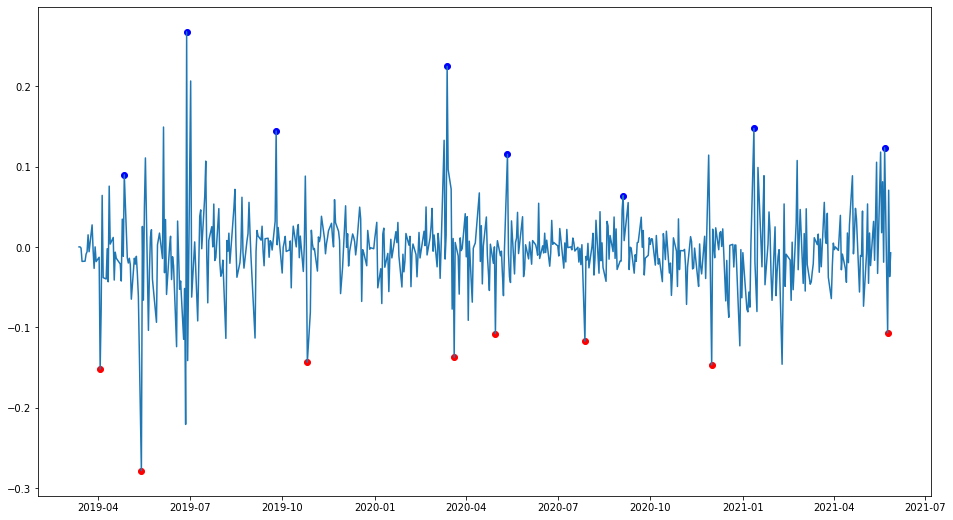

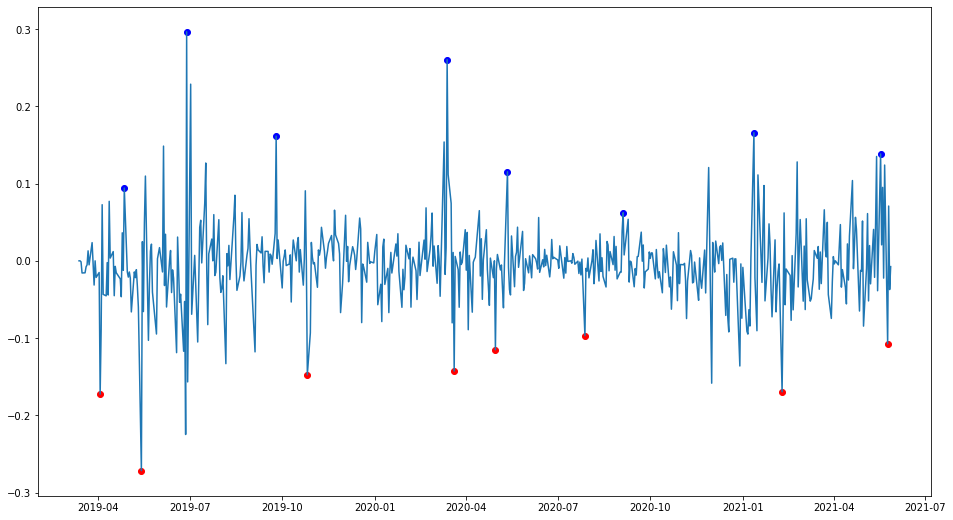

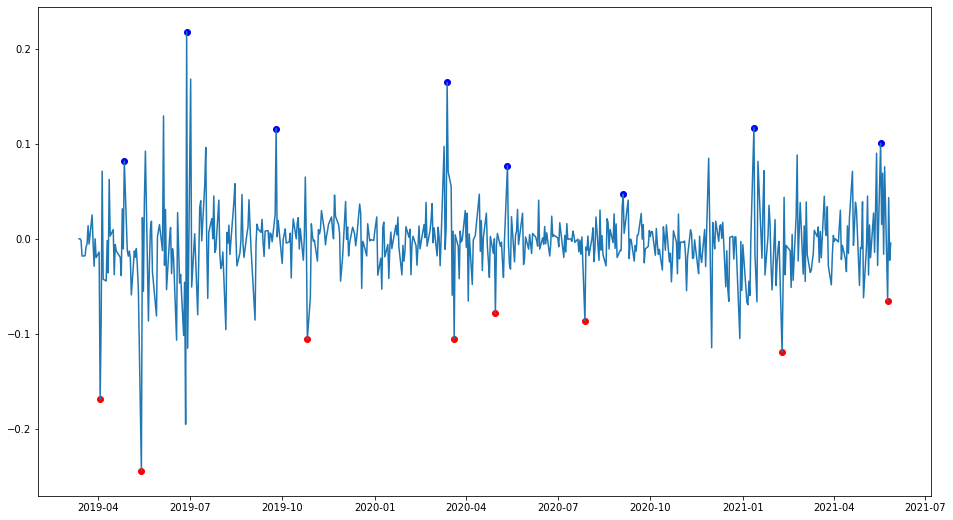

In [208]:
Mt_outer = []
Mi_outer = []

mt_outer = []
mi_outer = []

rm = 'ERM k=10'

for rn in order:
    path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                    %(rn, rm)

    df = pd.read_csv(path)
    df.Date = pd.to_datetime(df.Date)
    print(df.Date[0])
    rs = df.rs
    rh = df.rh

    diff = rh-rs

    M = []
    Mt = []
    Mi= []
    m = []
    mt = []
    mi = []
    BS = 75

    for i in range(0, len(diff), BS):
#         if i+BS >=len(diff):
#             break
        M.append(np.max(diff[i:i+BS]))
        Mt.append(df.Date[np.argmax(diff[i:i+BS])])
        Mi.append(np.argmax(diff[i:i+BS]))
        
        
        m.append(np.min(diff[i:i+BS]))
        mt.append(df.Date[np.argmin(diff[i:i+BS])])
        mi.append(np.argmin(diff[i:i+BS]))

    plt.figure(figsize=(16,9))
    plt.plot(df.Date, diff)

    for i in mi:
        plt.scatter(df.Date[i], diff[i], color='r')
    for i in Mi:
        plt.scatter(df.Date[i], diff[i], color='b')

        
    Mt_outer.append(Mt)
    Mi_outer.append(Mi)
    mt_outer.append(mt)
    mi_outer.append(mi)

In [209]:
c = []
for i in range(len(mt_outer)):
    dates = list(pd.Series(mt_outer[i]).dt.strftime("%Y-%m-%d"))
    c.append(pd.DataFrame(dates, index=mt_outer[i]))
    
d = []
for i in range(len(mt_outer)):
    dates = list(pd.Series(Mt_outer[i]).dt.strftime("%Y-%m-%d"))
    d.append(pd.DataFrame(dates, index=Mt_outer[i]))


In [210]:
result = pd.concat(c, axis=1)
result.columns = coin_names
result.reset_index(drop=True)

,btc,CRIX,BITX,BITW100,BITW20,BITW70,ada,eth,ltc,xrp
0,2019-04-02,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-02,2019-04-02,2019-04-02
1,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-23,NaN,NaN,NaN
2,2019-05-13,NaN,NaN,NaN,NaN,NaN,2019-05-13,2019-05-13,2019-05-13,2019-05-13
3,2019-10-25,2019-10-25,2019-10-25,2019-10-25,2019-10-25,2019-10-25,2019-10-25,2019-10-25,2019-10-25,2019-10-25
4,NaN,2020-01-07,NaN,NaN,NaN,NaN,2020-01-07,NaN,NaN,NaN
5,2020-03-19,2020-03-19,2020-03-19,2020-03-19,2020-03-19,2020-03-19,2020-03-19,2020-03-19,2020-03-19,2020-03-19
6,2020-04-29,NaN,2020-04-29,2020-04-29,2020-04-29,2020-04-29,NaN,2020-04-29,2020-04-29,2020-04-29
7,2020-07-27,2020-07-27,2020-07-27,2020-07-27,2020-07-27,2020-07-27,2020-07-27,2020-07-27,2020-07-27,2020-07-27
8,NaN,NaN,NaN,NaN,2020-11-30,2020-11-30,NaN,2020-11-30,NaN,NaN
9,2021-02-08,NaN,2021-02-08,2021-02-08,NaN,NaN,2021-02-08,NaN,2021-02-08,2021-02-08


In [211]:
result = pd.concat(d, axis=1)
result.columns = coin_names
result.reset_index(drop=True)

,btc,CRIX,BITX,BITW100,BITW20,BITW70,ada,eth,ltc,xrp
0,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-11,NaN,NaN,NaN
1,2019-04-26,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-26,2019-04-26,2019-04-26
2,2019-06-27,NaN,NaN,NaN,NaN,NaN,2019-06-27,2019-06-27,2019-06-27,2019-06-27
3,2019-09-24,2019-09-24,NaN,NaN,NaN,NaN,2019-09-24,2019-09-24,2019-09-24,2019-09-24
4,NaN,NaN,2019-10-23,2019-10-23,2019-10-23,2019-10-23,NaN,NaN,NaN,NaN
5,2020-03-12,2020-03-12,2020-03-12,2020-03-12,2020-03-12,2020-03-12,2020-03-12,2020-03-12,2020-03-12,2020-03-12
6,2020-05-11,2020-05-11,2020-05-11,2020-05-11,2020-05-11,2020-05-11,2020-05-11,2020-05-11,2020-05-11,2020-05-11
7,2020-09-03,2020-09-03,2020-09-03,2020-09-03,2020-09-03,2020-09-03,2020-09-03,2020-09-03,2020-09-03,2020-09-03
8,2021-01-11,2021-01-11,2021-01-11,2021-01-11,2021-01-11,2021-01-11,NaN,2021-01-11,2021-01-11,2021-01-11
9,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-12,NaN,NaN,NaN


In [203]:
from toolbox import *

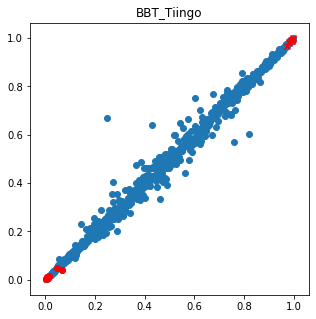

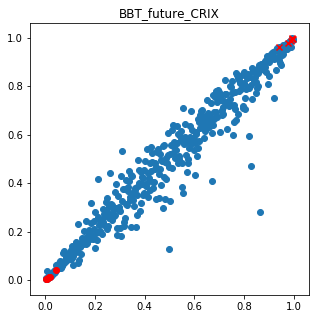

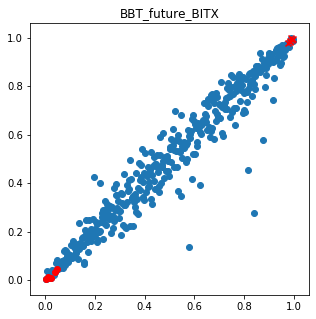

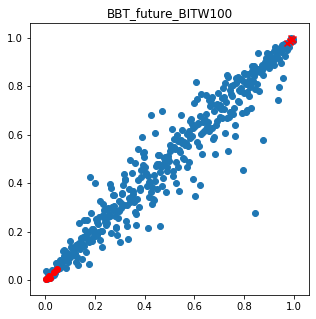

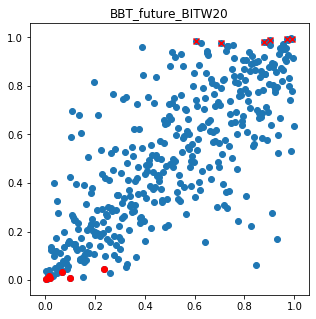

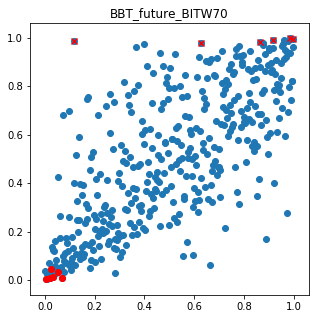

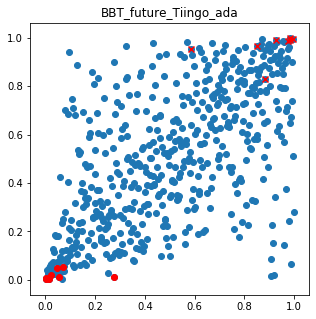

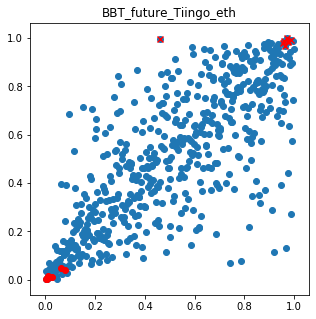

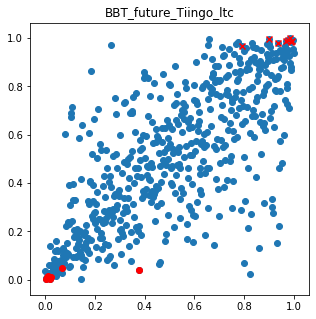

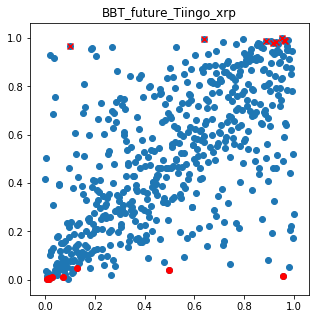

In [204]:
for i in range(len(order)):
    rn = order[i]

    path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                        %(rn, rm)

    df = pd.read_csv(path)
    df.Date = pd.to_datetime(df.Date)

    u = ECDF(df.rs)(df.rs)
    v = ECDF(df.rf)(df.rf)

    plt.figure(figsize=(5,5))
    plt.scatter(u,v)
    plt.scatter(u[mi_outer[i]],v[mi_outer[i]], marker='x', color='r')
    plt.scatter(u[Mi_outer[i]],v[Mi_outer[i]], marker='o', color='r')

    plt.title(rn)

2021-05-27 20:00:00
2021-05-27 20:00:00
2021-05-27 20:00:00
2021-05-27 20:00:00
2021-05-27 20:00:00
2021-05-27 20:00:00
2021-05-27 20:00:00
2021-05-27 20:00:00
2021-05-27 20:00:00
2021-05-27 20:00:00


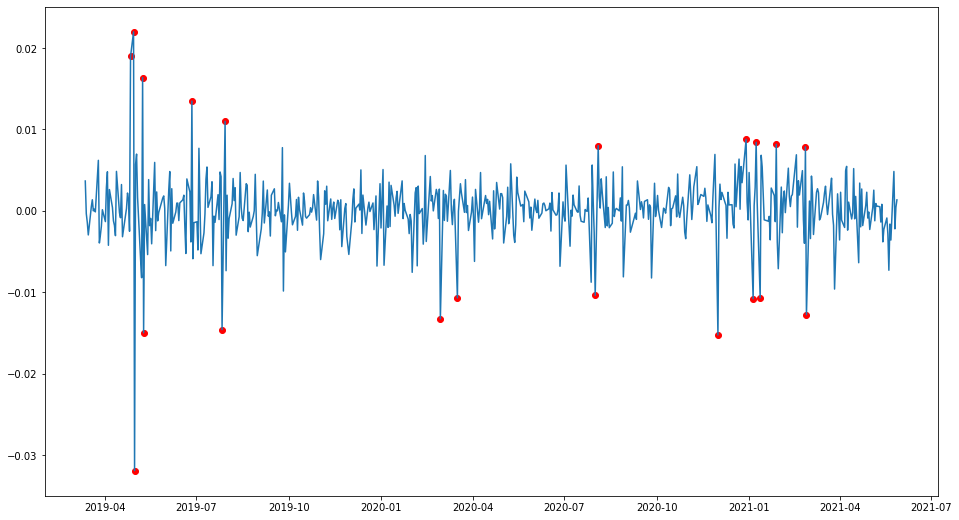

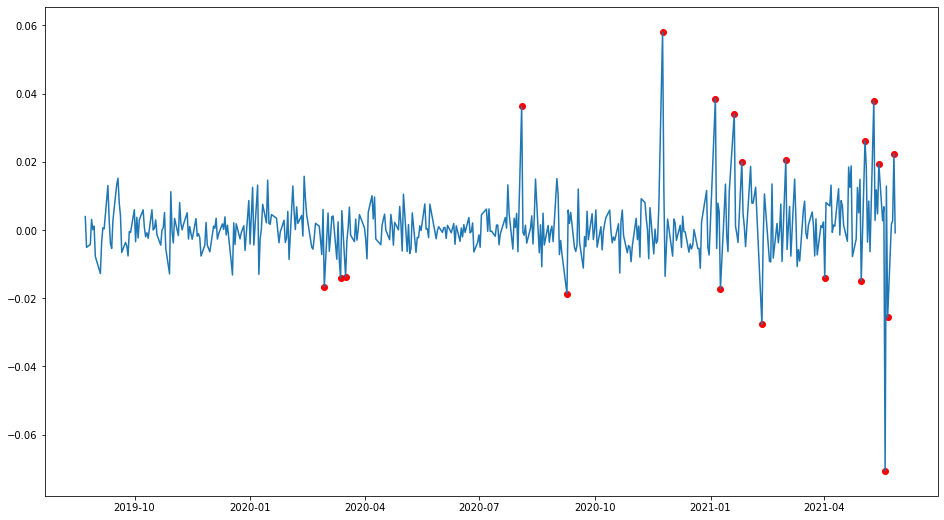

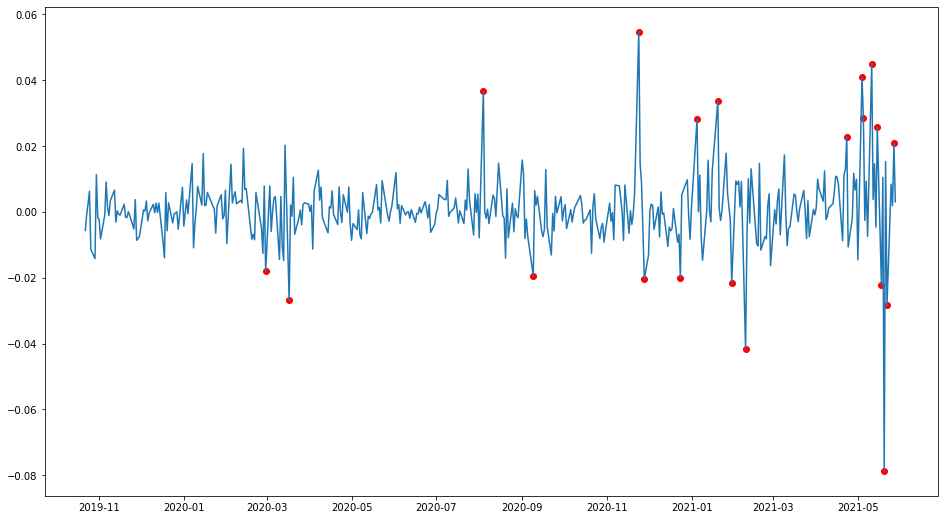

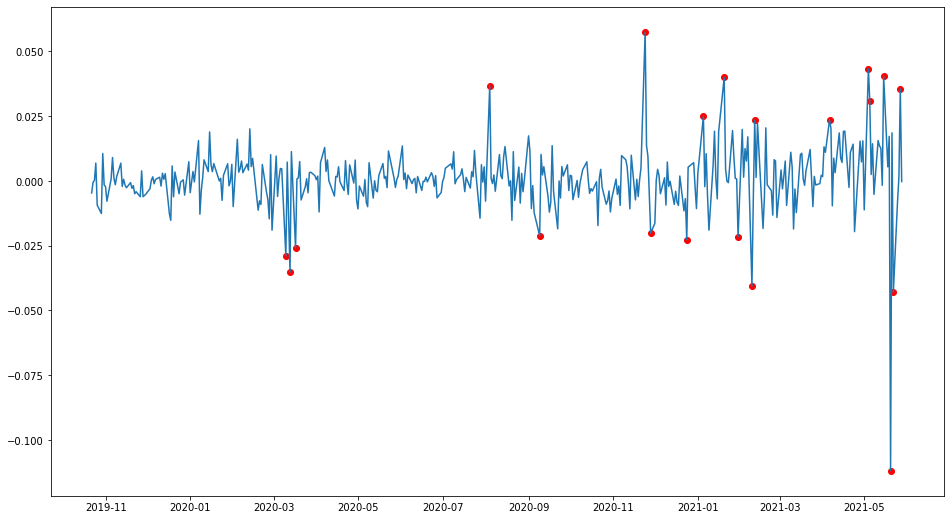

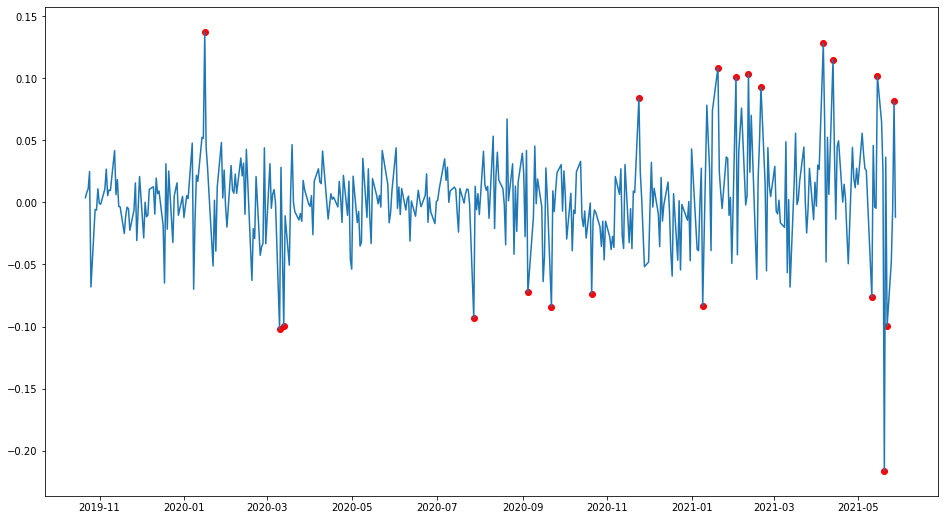

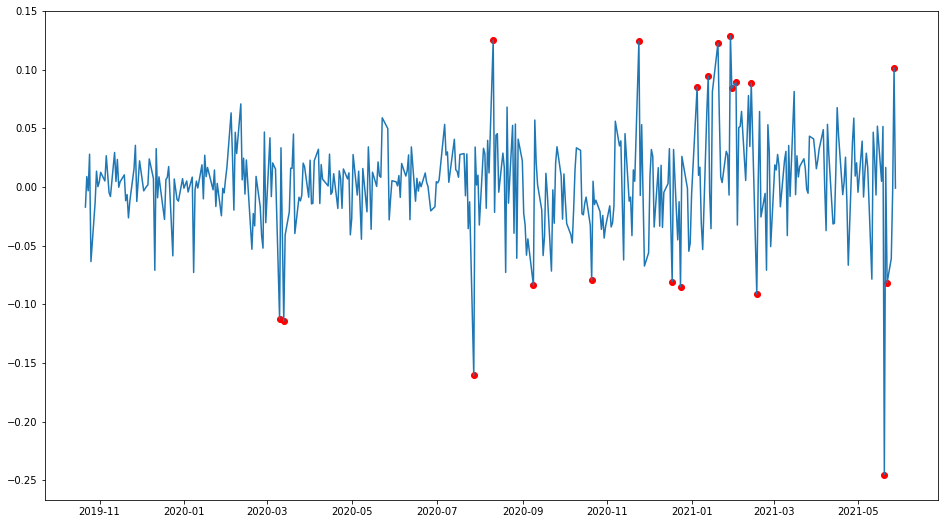

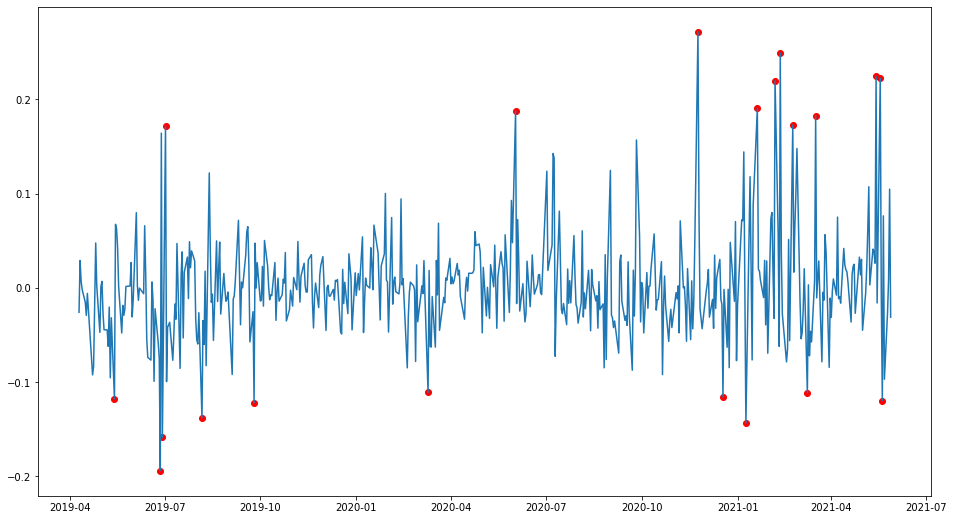

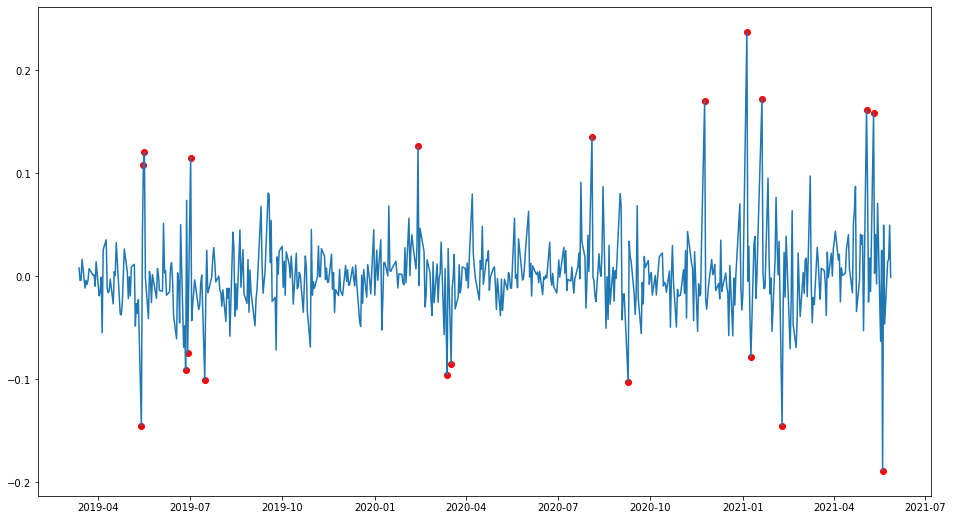

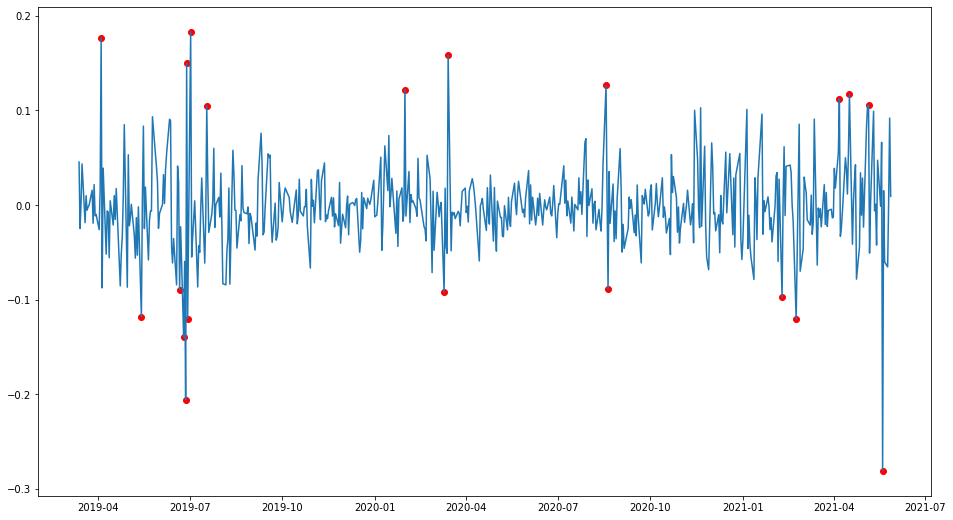

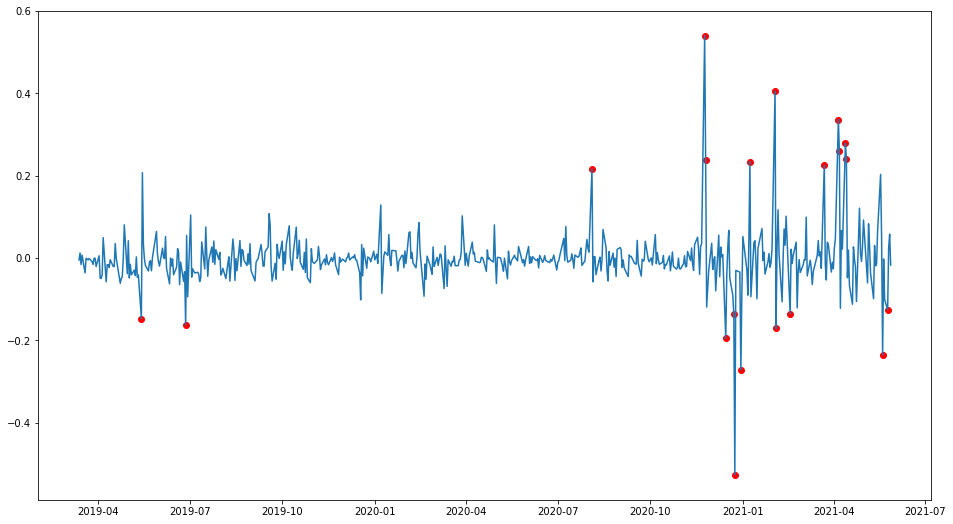

In [383]:
# Top 5 worst days
M_outer = []
m_outer = []

num = 10

rm = 'ERM k=10'

for rn in order:
    path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                    %(rn, rm)

    df = pd.read_csv(path)
    df.Date = pd.to_datetime(df.Date)
    print(df.Date[0])
    rs = df.rs
    rh = df.rh

    df.loc[:,'diff'] = df.rh-df.rs

    plt.figure(figsize=(16,9))
    plt.plot(df.Date, df.loc[:,'rh'])

    m = df.sort_values('rh').loc[:, ['Date', 'rs', 'rf', 'rh']].iloc[:num, :]
    M = df.sort_values('rh').loc[:, ['Date', 'rs', 'rf', 'rh']].iloc[-num:,:]
#     for i in mi:
    plt.scatter(list(m.Date), m.rh, color='r')
#     for i in Mi:
    plt.scatter(list(M.Date), M.rh, color='r')

    M_outer.append(M)
    m_outer.append(m)

In [384]:
c = []
for i in range(len(m_outer)):
    dates = list(m_outer[i].Date.dt.strftime("%Y-%m-%d"))
    dates = np.sort(dates)[::-1]
    c.append(pd.DataFrame(dates, index=dates))
    
d = []
for i in range(len(M_outer)):
    dates = list(M_outer[i].Date.dt.strftime("%Y-%m-%d"))
    dates = np.sort(dates)
    d.append(pd.DataFrame(dates, index=dates))

In [385]:
result = pd.concat(c, axis=1)
result.columns = coin_names
result
# result.reset_index(drop=True)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,btc,CRIX,BITX,BITW100,BITW20,BITW70,ada,eth,ltc,xrp
2019-04-30,2019-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-09,2019-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-13,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-13,2019-05-13,2019-05-13,2019-05-13
2019-06-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-20,NaN
2019-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-24,NaN
2019-06-26,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-26,2019-06-26,2019-06-26,2019-06-26
2019-06-28,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-28,2019-06-28,2019-06-28,NaN
2019-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-15,NaN,NaN
2019-07-26,2019-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-05,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-05,NaN,NaN,NaN


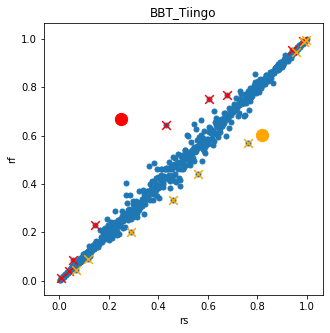

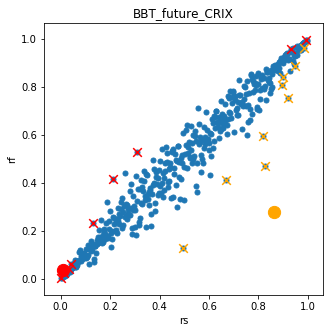

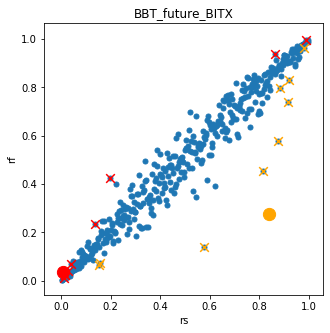

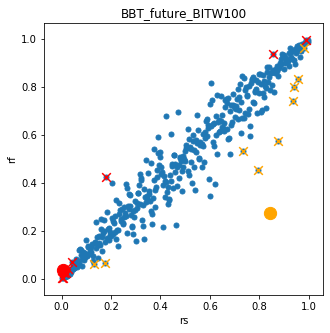

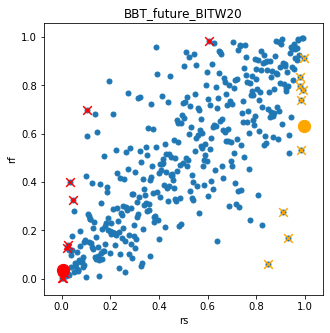

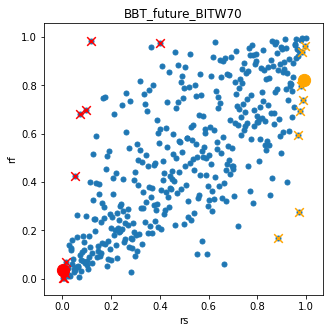

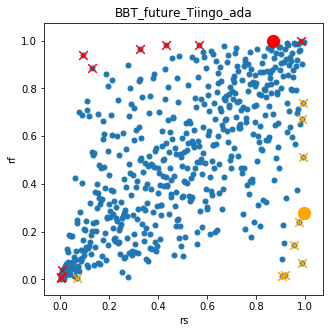

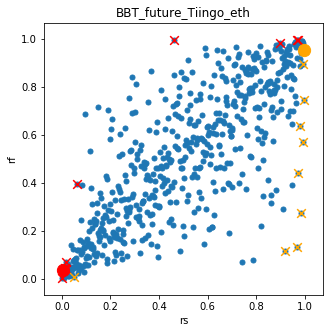

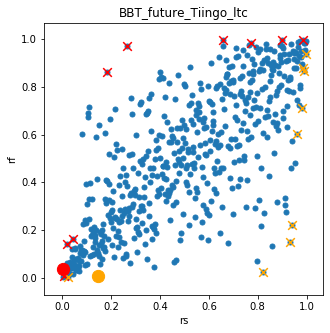

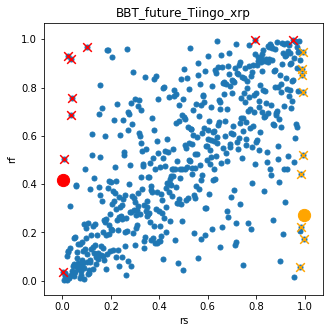

In [386]:
for i in range(len(order)):
    rn = order[i]

    path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                        %(rn, rm)

    df = pd.read_csv(path)
    df.Date = pd.to_datetime(df.Date)

    ecdf_rs = ECDF(df.rs)
    ecdf_rf = ECDF(df.rf)

    u = ecdf_rs(df.rs)
    v = ecdf_rf(df.rf)
        
    plt.figure(figsize=(5,5))
    plt.scatter(u,v, s=25)
    plt.scatter(ecdf_rs(list(m_outer[i].rs)),ecdf_rf(list(m_outer[i].rf)),
                marker='x', color='r', s=75)
    
    plt.scatter(ecdf_rs(list(M_outer[i].rs)),ecdf_rf(list(M_outer[i].rf)),
                marker='x', color='orange', s=75)
    
    
    min_id = np.argmin(m_outer[i].rh)
    max_id = np.argmax(M_outer[i].rh)
    min_rs = m_outer[i].loc[min_id, 'rs']
    min_rf = m_outer[i].loc[min_id, 'rf']
    max_rs = M_outer[i].loc[max_id, 'rs']
    max_rf = M_outer[i].loc[max_id, 'rf']
    plt.scatter(ecdf_rs([min_rs]), ecdf_rf([min_rf]), color='r', marker='o', s=150)
    plt.scatter(ecdf_rs([max_rs]), ecdf_rf([max_rf]), color='orange', marker='o', s=150)

#     plt.xlim((0, 1))
#     plt.ylim((0, 1))
    plt.xlabel('rs')
    plt.ylabel('rf')

    plt.title(rn)

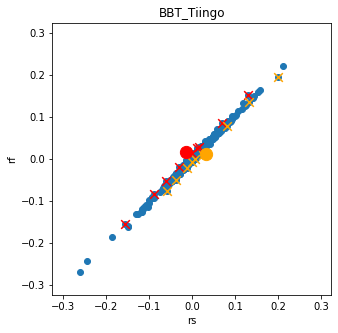

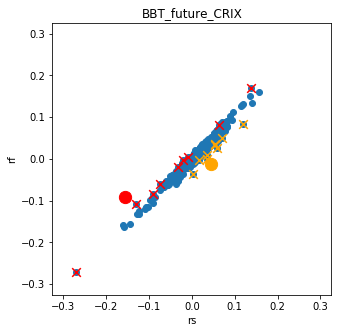

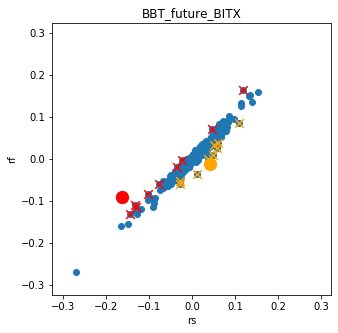

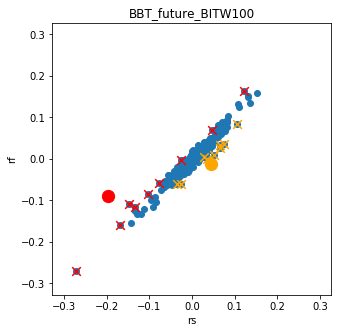

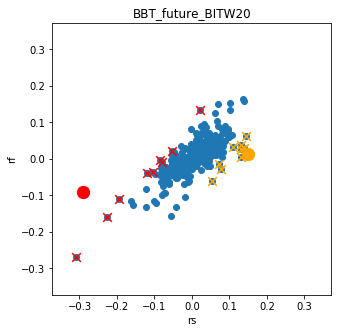

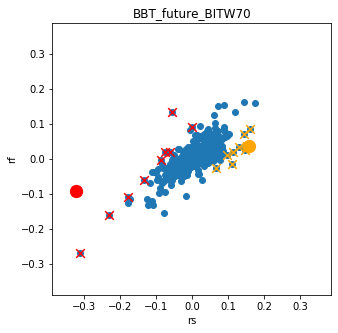

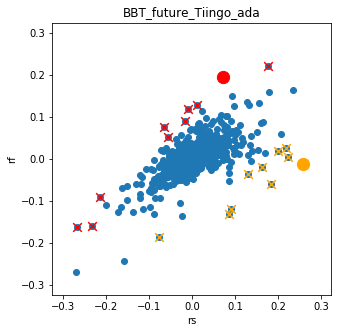

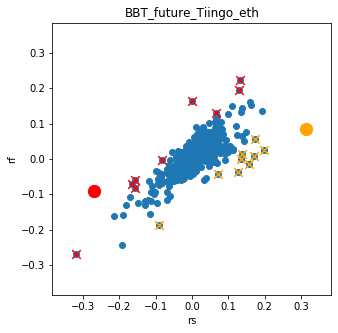

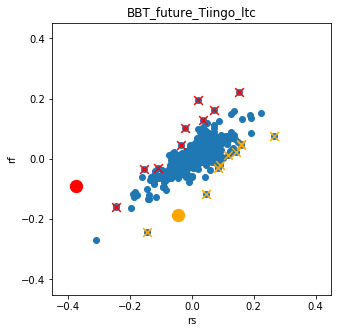

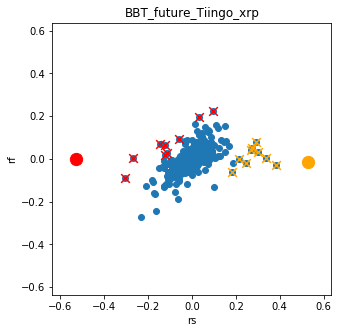

In [389]:
for i in range(len(order)):
    rn = order[i]

    path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                        %(rn, rm)

    df = pd.read_csv(path)
    df.Date = pd.to_datetime(df.Date)

    ecdf_rs = ECDF(df.rs)
    ecdf_rf = ECDF(df.rf)

    u = df.rs
    v = df.rf
    
    _max = np.max([np.abs(u),np.abs(v)])*1.2
    
    plt.figure(figsize=(5,5))
    plt.scatter(u,v)
    plt.scatter((list(m_outer[i].rs)),(list(m_outer[i].rf)),
                marker='x', color='r', s=75)
    
    plt.scatter((list(M_outer[i].rs)),(list(M_outer[i].rf)),
                marker='x', color='orange', s=75)

    plt.xlim((-_max, _max))
    plt.ylim((-_max, _max))
    
    min_id = np.argmin(m_outer[i].rh)
    max_id = np.argmax(M_outer[i].rh)
    min_rs = m_outer[i].loc[min_id, 'rs']
    min_rf = m_outer[i].loc[min_id, 'rf']
    max_rs = M_outer[i].loc[max_id, 'rs']
    max_rf = M_outer[i].loc[max_id, 'rf']
    plt.scatter(([min_rs]), ([min_rf]), color='r', marker='o', s=150)
    plt.scatter(([max_rs]), ([max_rf]), color='orange', marker='o', s=150)
    
    plt.xlabel('rs')
    plt.ylabel('rf')

    plt.title(rn)

In [336]:
result = pd.concat(d, axis=1)
result.columns = coin_names
result.reset_index(drop=True)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,btc,CRIX,BITX,BITW100,BITW20,BITW70,ada,eth,ltc,xrp
0,2019-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-03,NaN
2,2019-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-14
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-15,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-16,NaN,NaN
9,2019-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
